# Neuro Screen Capture - Simple Viewer

Set the path to your `.raw` file. The resolution is detected from the filename.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# --- SETUP WORKING DIRECTORY ---
# Ensure we are in the correct directory to find files relative to the project subfolder
# base_path = "c:/programming/auto_remaster/inference_optimization/neuro_screen_capture/end2end_tensorrt"
# inference_optimization\neuro_screen_capture\end2end_tensorrt\build\Release\recordings\Window_1770500429353_1024x512.raw
FILE_PATH = r"inference_optimization\neuro_screen_capture\end2end_tensorrt\build\Release\recordings\Window_1770501408589_1024x512.raw"
CHANNELS = 3
FPS = 24

def load_recording(path):
    if "INSERT_FILENAME_HERE" in path:
        print("Please update FILE_PATH in the cell above with your actual recording filename.")
        return None
        
    if not os.path.exists(path):
        print(f"Error: File not found at {path}")
        # Try searching recursively for .raw files to be helpful
        print("Searching for .raw files...")
        import glob
        found = glob.glob("**/*.raw", recursive=True)
        if found:
            print(f"Found possible files: {found[:5]}")
        return None

    # Parse Resolution
    try:
        base = os.path.basename(path)
        res_part = base.split('_')[-1].split('.')[0]
        w_str, h_str = res_part.split('x')
        width = int(w_str)
        height = int(h_str)
        print(f"Detected resolution: {width}x{height}")
    except:
        print("Could not parse resolution from filename. Defaulting to 1024x512.")
        width=1024
        height=512
        
    raw_data = np.fromfile(path, dtype=np.uint8)
    frame_size = width * height * CHANNELS
    num_frames = raw_data.size // frame_size
    
    print(f"Loaded {path}")
    print(f"Total Frames: {num_frames}")
    print(f"Total Size: {raw_data.size / (1024*1024):.2f} MB")
    
    valid_size = num_frames * frame_size
    try:
        return raw_data[:valid_size].reshape((num_frames, height, width, CHANNELS)), width, height
    except ValueError as e:
        print(f"Reshape failed: {e}. Check resolution detection.")
        return None, 0, 0

video_data, RES_W, RES_H = load_recording(FILE_PATH)

Detected resolution: 1024x512
Loaded inference_optimization\neuro_screen_capture\end2end_tensorrt\build\Release\recordings\Window_1770501408589_1024x512.raw
Total Frames: 1306
Total Size: 1959.00 MB


## View Specific Frame

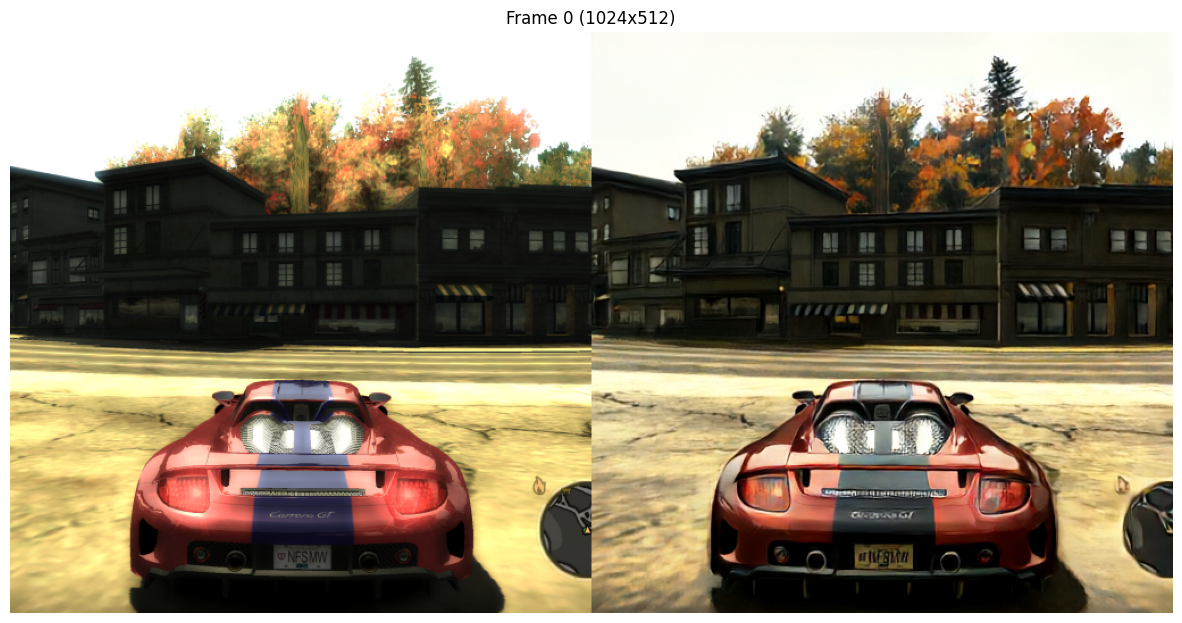

In [8]:
# --- FRAME SELECTION ---
FRAME_IDX = 0  # Change this value to view a different frame

if video_data is not None and FRAME_IDX < len(video_data):
    plt.figure(figsize=(15, 8)) # Wider figure for split screen
    plt.imshow(video_data[FRAME_IDX])
    plt.title(f"Frame {FRAME_IDX} ({RES_W}x{RES_H})")
    plt.axis('off')
    plt.show()
else:
    print("Invalid frame index or no data loaded.")

## Export to MP4

In [9]:
def export_video(output_filename="output.mp4", fps=24):
    if video_data is None: 
        print("No data loaded.")
        return

    print(f"Exporting to {output_filename} at {fps} FPS ({RES_W}x{RES_H})...")
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_filename, fourcc, fps, (RES_W, RES_H))
    
    for i in range(len(video_data)):
        # Convert RGB (Matplotlib/Raw) to BGR (OpenCV)
        frame_bgr = cv2.cvtColor(video_data[i], cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
        
        if i % 50 == 0:
            print(f"Processed {i}/{len(video_data)} frames...", end='\r')
            
    out.release()
    print(f"\nDone! Saved to {output_filename}")

# Uncomment to run export
export_video("converted_recording.mp4")

Exporting to converted_recording.mp4 at 24 FPS (1024x512)...
Processed 1300/1306 frames...
Done! Saved to converted_recording.mp4
